In [1]:
import sys
import gc
import glob
import re
from mne_bids import BIDSPath, read_raw_bids
from bids import BIDSLayout
import numpy as np
import mne
import matplotlib.pyplot as plt
from autoreject import get_rejection_threshold, validation_curve

---------- Import data ----------
17 expectationsABR
../data/bids/sub-17/eeg/sub-17_task-expectationsABR_eeg.vhdr
Reading 0 ... 59929999  =      0.000 ...  2397.200 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15']
---------- Epoch ----------
Not setting metadata
8793 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8793 events and 5001 original time points ...
1 bad epochs dropped
---------- Iterate over conditions ----------
Skipping New Segment/
Stimulus/S  2
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
---------- Plot PSD ----------
NOTE: plot_psd() is a legacy funct

/tmp/ipykernel_16550/3869217133.py:43: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = evoked.plot_psd(picks = ['BIP1'], fmax = 450)


---------- Plot in time domain ----------
Need more than one channel to make topography for eeg. Disabling interactivity.


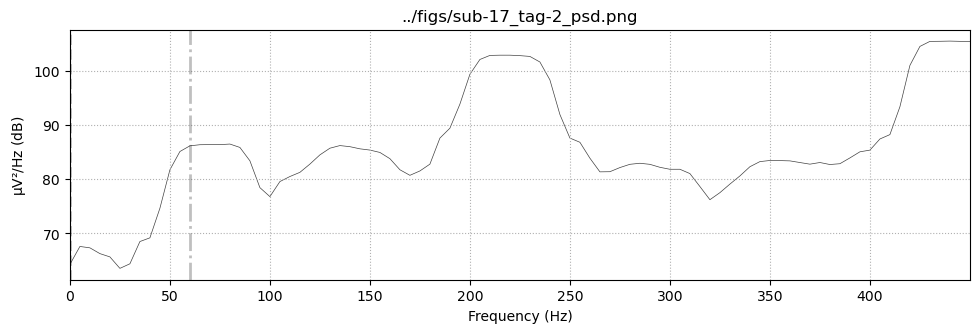

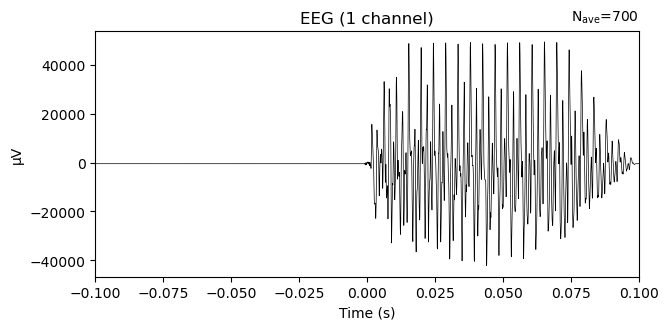

In [25]:
task = 'expectationsABR'
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT)
subs = layout.get_subjects()

for sub in subs:

    print("---------- Import data ----------")
    print(sub, task)
    bids_path = BIDSPath(root = BIDS_ROOT,
                        subject = sub,
                        task = task,
                        datatype = 'eeg',
                        )
    print(bids_path)
    raw = read_raw_bids(bids_path, verbose = False)
    raw.load_data()
    raw = raw.pick_types(eeg = True)
    events, event_ids = mne.events_from_annotations(raw)

    print("---------- Epoch ----------")
    epochs = mne.Epochs(
        raw,
        events,
        tmin = -0.1,
        tmax = 0.1,
        baseline = None, 
        event_id = event_ids, 
        preload = True
    )
    
    print("---------- Iterate over conditions ----------")
    for event_id in event_ids.keys():
        if event_id == 'New Segment/':
            print('Skipping New Segment/')
            continue
        print(event_id)
        tag = re.findall(r"[0-9]+", event_id)[0]
        
        evoked = epochs[event_id].average()
        
        print("---------- Plot PSD ----------")
        fig = evoked.plot_psd(picks = ['BIP1'], fmax = 450)
        title = f'../figs/sub-{sub}_tag-{tag}_psd.png'
        plt.title(title)
        fig.savefig(fname = title)
        fig.show()
        
        print("---------- Plot in time domain ----------")
        fig = evoked.plot(picks = ['BIP1'])
        title = f'../figs/sub-{sub}_tag-{tag}_wav.png'
        plt.title(title)
        fig.savefig(fname = title)
        fig.show()
        break
    break

In [29]:
events[4400:4500]

array([[31060992,        0,        6],
       [31066366,        0,        7],
       [31071681,        0,        5],
       [31076994,        0,        7],
       [31082367,        0,        6],
       [31087681,        0,        5],
       [31092996,        0,        7],
       [31098369,        0,        5],
       [31103682,        0,        6],
       [31108995,        0,        5],
       [31114368,        0,        7],
       [31119684,        0,        6],
       [31124995,        0,        5],
       [31130371,        0,        7],
       [31135684,        0,        6],
       [31140996,        0,        7],
       [31146369,        0,        5],
       [31151686,        0,        6],
       [31156996,        0,        7],
       [31162371,        0,        6],
       [31167684,        0,        5],
       [31173000,        0,        6],
       [31178372,        0,        7],
       [31183687,        0,        5],
       [31188996,        0,        5],
       [31194372,        